In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train / 255.0  # 0~255 값을 0~1로 정규화
x_test = x_test / 255.0

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


In [3]:
import numpy as np

print(x_train[0].shape)
print(np.max(x_train[0]), np.min(x_train[0]))

(28, 28)
1.0 0.0


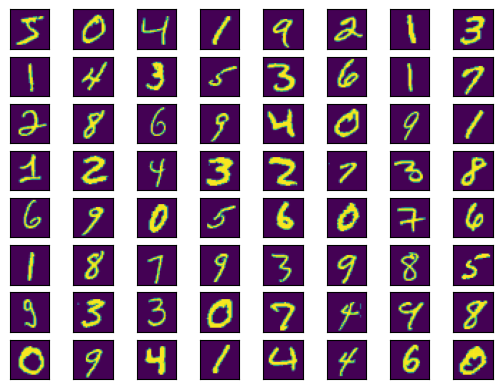

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 8)
for i in range(64):
    ax[i//8][i%8].imshow(x_train[i])
    ax[i//8][i%8].set_xticks([])
    ax[i//8][i%8].set_yticks([])

In [5]:
# 모델 정의
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 벡터로 변환
    layers.Dense(128, activation='relu'),  # 128 뉴런의 완전 연결층
    layers.Dense(10, activation='softmax') # 10개의 출력 클래스 (0~9 숫자)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 모델 컴파일
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 모델 학습
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6648 - loss: 1.2812
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8846 - loss: 0.4401
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9024 - loss: 0.3586
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9117 - loss: 0.3186
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9169 - loss: 0.2987


In [8]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.3119


In [15]:
# 모델이 틀린 이미지들 확인

for i in range(100):
    img = x_test[i]
    label = y_test[i]
    pred = model.predict(img.reshape(1, 28, 28), verbose=0)
    if tf.argmax(label) != tf.argmax(pred[0]):
        print(i)

8
33
77


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


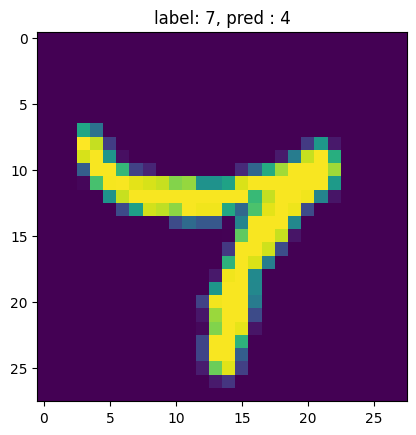

In [23]:
idx = 124

# 모델 예측
img = x_test[idx]
label = y_test[idx]

pred = model.predict(img.reshape(1, 28, 28))

# 예시로 첫 번째 테스트 이미지를 시각화
plt.imshow(img)  # 테스트 이미지 출력
plt.title(f"label: {tf.argmax(label)}, pred : {tf.argmax(pred[0])}")  # 실제 라벨과 예측 라벨
plt.show()